# Домашнее задание 3

Центральная предельная теорема своими руками

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=true).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n? 

Решение должно представлять собой IPython-ноутбук, содержащий:
- код, генерирующий выборки и графики;
- краткие описания каждого блока кода, объясняющие, что он делает;
- необходимые графики (убедитесь, что на них подписаны оси);
- выкладки с вычислениями параметров нормальных распределений, аппроксимирующих выборочные средние при различных n;
- выводы по результатам выполнения задания.


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Попробуем взять неизветсное распределения из scipy.stats. Например, burr

In [52]:
c, d = 10.5, 4.3

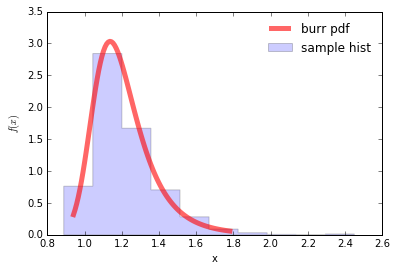

In [115]:
from scipy.stats import burr
fig, ax = plt.subplots(1, 1)
x = np.linspace(burr.ppf(0.01, c, d), burr.ppf(0.99, c, d), 100)
ax.plot(x, burr.pdf(x, c, d),'r-', lw=5, alpha=0.6, label='burr pdf')
ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2, label = 'sample hist')
ax.legend(loc='best', frameon=False)
plt.xlabel('x')
plt.ylabel('$f(x)$')

Далее нам необходимо будет вычислять среднее значение и дисперсию используемого распределения, однако для распределения burr имеются очень большая вычислительная сложность для определения необходимых величин. Поэтому возьмем более простое распределение, например F-распределение.

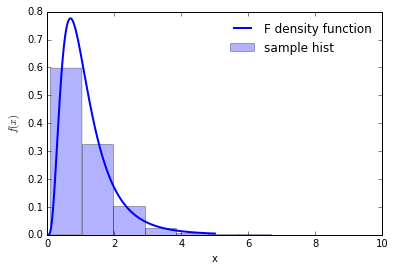

In [114]:
a = sts.f.rvs(dfn = 8, dfd = 12,size = 1000)
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 5, 1000)
ax.hist(a, normed=True,alpha=0.3, label = 'sample hist')
ax.plot(x, sts.f.pdf(x,dfn = 10, dfd = 12), c = 'blue', lw=2, alpha=1, label='F density function')
ax.legend(loc='best', frameon=False)
plt.xlabel('x')
plt.ylabel('$f(x)$')

Используя формулы теоритического среднего и дисперсии, вычислим значения для dfn = 8, dfd = 12

In [96]:
dfn= 8.0
dfd= 12.0
t_mean= dfd/(dfd-2)
t_var=2*((dfd)**2)*(dfn+dfd-2)/(dfn*((dfd-2)**2)*(dfd-4))
print('t_mean=',t_mean,'t_var=',t_var)

('t_mean=', 1.2, 't_var=', 0.81)


По ЦПТ выборочные средние должны подчиняться норм закону распределения с параметрами (1.2, 0.81/n) 

Для n=5 генерируем 1000 выборок и находим для каждой выборки выборочное среднее

In [98]:
rand=sts.f.rvs(size = (1000, 5), dfn = 8, dfd = 12)
mean = []
for i in rand:
    mean.append(i.mean())  

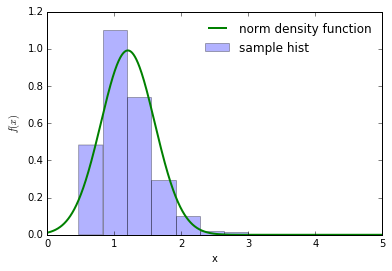

In [101]:
n=5
mu = 1.2
sigma = np.sqrt(0.81/n)
fig, ax = plt.subplots(1, 1)
ax.hist(np.array(mean), normed=True,alpha=0.3, label = 'sample hist')
x = np.linspace(0, 5, 1000)
norm_d = sts.norm(loc = mu, scale = sigma)
ax.plot(x, norm_d.pdf(x), lw=2, alpha=1, label='norm density function')

ax.legend(loc='best', frameon=False)
plt.xlabel('x')
plt.ylabel('$f(x)$')

Для n=10 :

In [102]:
rand=sts.f.rvs(size = (1000, 10), dfn = 8, dfd = 12)
mean = []
for i in rand:
    mean.append(i.mean()) 

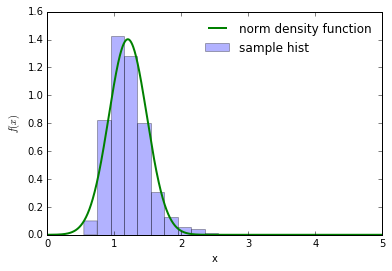

In [103]:
n=10
mu = 1.2
sigma = np.sqrt(0.81/n)
fig, ax = plt.subplots(1, 1)
ax.hist(np.array(mean), normed=True,alpha=0.3, label = 'sample hist')
x = np.linspace(0, 5, 1000)
norm_d = sts.norm(loc = mu, scale = sigma)
ax.plot(x, norm_d.pdf(x), lw=2, alpha=1, label='norm density function')

ax.legend(loc='best', frameon=False)
plt.xlabel('x')
plt.ylabel('$f(x)$')

Для n=50 :

In [104]:
rand=sts.f.rvs(size = (1000, 50), dfn = 8, dfd = 12)
mean = []
for i in rand:
    mean.append(i.mean()) 

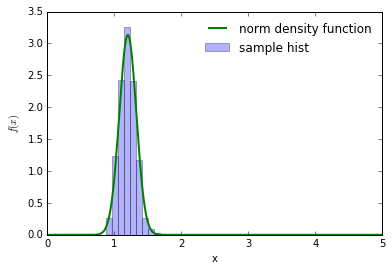

In [105]:
n=50
mu = 1.2
sigma = np.sqrt(0.81/n)
fig, ax = plt.subplots(1, 1)
ax.hist(np.array(mean), normed=True,alpha=0.3, label = 'sample hist')
x = np.linspace(0, 5, 1000)
norm_d = sts.norm(loc = mu, scale = sigma)
ax.plot(x, norm_d.pdf(x), lw=2, alpha=1, label='norm density function')

ax.legend(loc='best', frameon=False)
plt.xlabel('x')
plt.ylabel('$f(x)$')

Попробуем проделать то же самое для n = 100 :

In [106]:
rand=sts.f.rvs(size = (1000, 100), dfn = 8, dfd = 12)
mean = []
for i in rand:
    mean.append(i.mean()) 

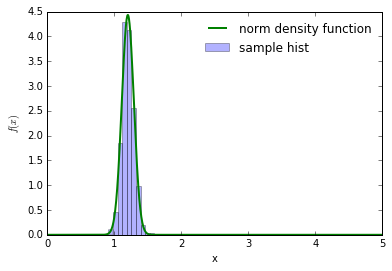

In [107]:
n=100
mu = 1.2
sigma = np.sqrt(0.81/n)
fig, ax = plt.subplots(1, 1)
ax.hist(np.array(mean), normed=True,alpha=0.3, label = 'sample hist')
x = np.linspace(0, 5, 1000)
norm_d = sts.norm(loc = mu, scale = sigma)
ax.plot(x, norm_d.pdf(x), lw=2, alpha=1, label='norm density function')

ax.legend(loc='best', frameon=False)
plt.xlabel('x')
plt.ylabel('$f(x)$')

Посмотрим, как меняется значение дисперсии выборочных средних в зависимости от n:

In [108]:
n = 5
print("For n = ", n, "variance : ", 0.81/n)

('For n = ', 5, 'variance : ', 0.162)


In [109]:
n = 10
print("For n = ", n, "variance : ", 0.81/n)

('For n = ', 10, 'variance : ', 0.081)


In [110]:
n = 50
print("For n = ", n, "variance : ", 0.81/n)

('For n = ', 50, 'variance : ', 0.016200000000000003)


In [111]:
n = 100
print("For n = ", n, "variance : ", 0.81/n)

('For n = ', 100, 'variance : ', 0.008100000000000001)


Видно, что чем больше значение n, тем меньше значение дисперсии выборочных средних

То есть точность аппроксимации растет с ростом n (т.к.дисперсия уменьшается), что и следует из ЦПТ 